In [1]:
import pandas as pd
df=pd.read_csv('data_for_exam.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [2]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [3]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [4]:
df.head(5)

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [5]:
df2=df.drop('Company public response',axis=1)
df2.head(3)

,Date received,Product,Sub-product,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN


In [6]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [7]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [8]:
df_cleaned = df.dropna(subset=['Consumer disputed?', 'ZIP code','Sub-product'])


In [9]:
df_cleaned.isnull().sum()

Date received                    0
Product                          0
Sub-product                      0
Consumer complaint narrative    59
Company public response         46
Company                          0
State                            0
ZIP code                         0
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?               0
dtype: int64

In [10]:
fill_values = {'Sub-product': 'Not Available', 'Consumer complaint narrative': 'Consumer not comment','Company public response': 'Company Remarks not Abvailable'}
df_filled = df_cleaned.fillna(fill_values)
df_filled.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [11]:
df_filled.head(15)

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,Consumer not comment,Company Remarks not Abvailable,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
4,9/13/2014,Debt collection,Credit card,Consumer not comment,Company Remarks not Abvailable,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
5,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),Consumer not comment,Company Remarks not Abvailable,U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,No
6,6/16/2015,Debt collection,Medical,Consumer not comment,Company believes it acted appropriately as aut...,California Accounts Service,CA,92111,Web,Closed with explanation,Yes,No
8,11/13/2015,Mortgage,Other mortgage,Consumer not comment,Company believes it acted appropriately as aut...,"Aldridge Pite, LLP",CA,93101,Referral,Closed with explanation,Yes,Yes
9,10/21/2014,Mortgage,Conventional fixed mortgage,Consumer not comment,Company Remarks not Abvailable,OCWEN LOAN SERVICING LLC,FL,32714,Web,Closed with explanation,Yes,No
10,4/14/2017,Mortgage,Other mortgage,Consumer not comment,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,Referral,Closed with explanation,Yes,No
11,3/30/2012,Student loan,Non-federal student loan,Consumer not comment,Company Remarks not Abvailable,Student Loan Finance Corporation,MN,55428,Web,Closed with explanation,Yes,No
13,11/14/2016,Mortgage,Conventional fixed mortgage,The entire lending experience with Citizens Ba...,Company Remarks not Abvailable,"CITIZENS FINANCIAL GROUP, INC.",NY,12054,Web,Closed with explanation,Yes,No
17,11/7/2014,Mortgage,Conventional fixed mortgage,Consumer not comment,Company Remarks not Abvailable,U.S. BANCORP,MT,59801,Web,Closed with explanation,Yes,No


In [12]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 61 non-null     object
 1   Product                       61 non-null     object
 2   Sub-product                   61 non-null     object
 3   Consumer complaint narrative  61 non-null     object
 4   Company public response       61 non-null     object
 5   Company                       61 non-null     object
 6   State                         61 non-null     object
 7   ZIP code                      61 non-null     object
 8   Submitted via                 61 non-null     object
 9   Company response to consumer  61 non-null     object
 10  Timely response?              61 non-null     object
 11  Consumer disputed?            61 non-null     object
dtypes: object(12)
memory usage: 6.2+ KB


In [13]:
unique_counts = df_filled.nunique()

print(unique_counts)

Date received                   61
Product                          6
Sub-product                     16
Consumer complaint narrative     3
Company public response          5
Company                         37
State                           27
ZIP code                        61
Submitted via                    5
Company response to consumer     5
Timely response?                 1
Consumer disputed?               2
dtype: int64


<h1>
37 companies are working on 06 products in 27 States.
Companies are responding In Time.
To received Complaints 5 mediums are used.

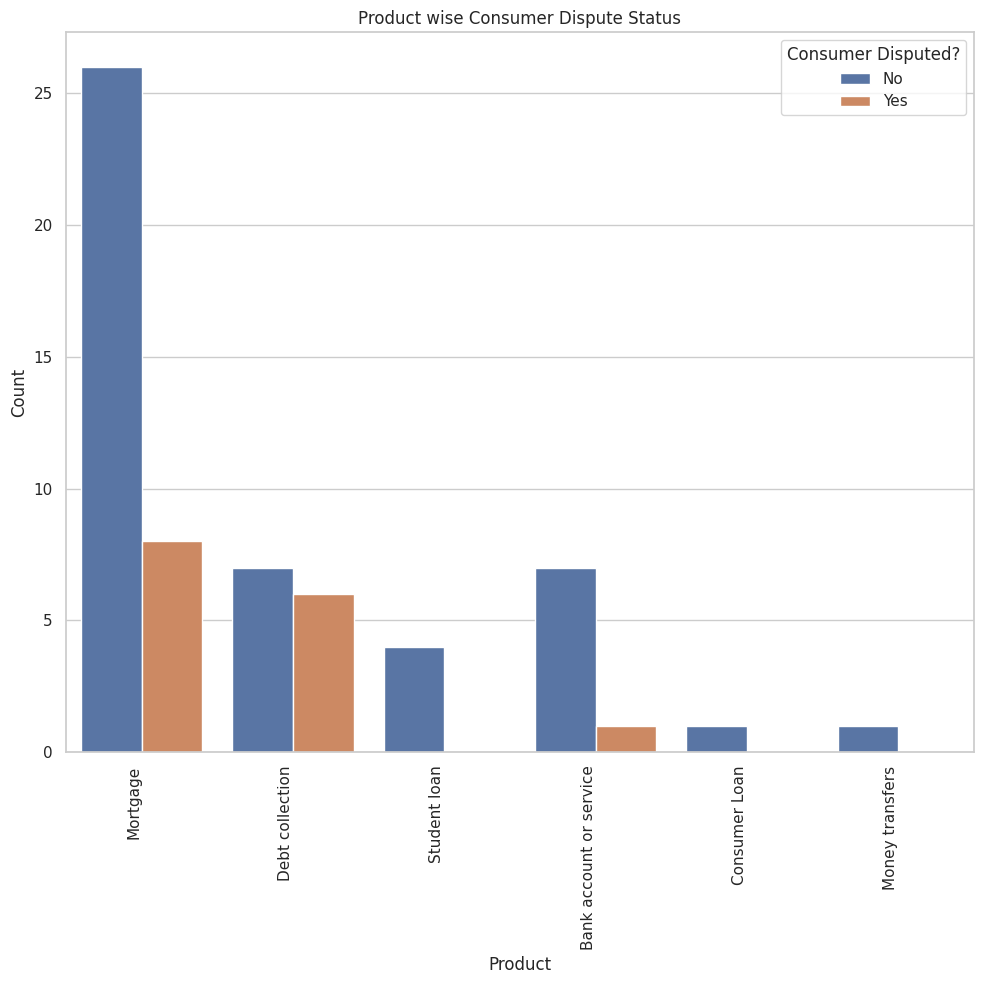

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_filled, x='Product', hue='Consumer disputed?')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Product wise Consumer Dispute Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Consumer Disputed?')

plt.tight_layout()
plt.show()

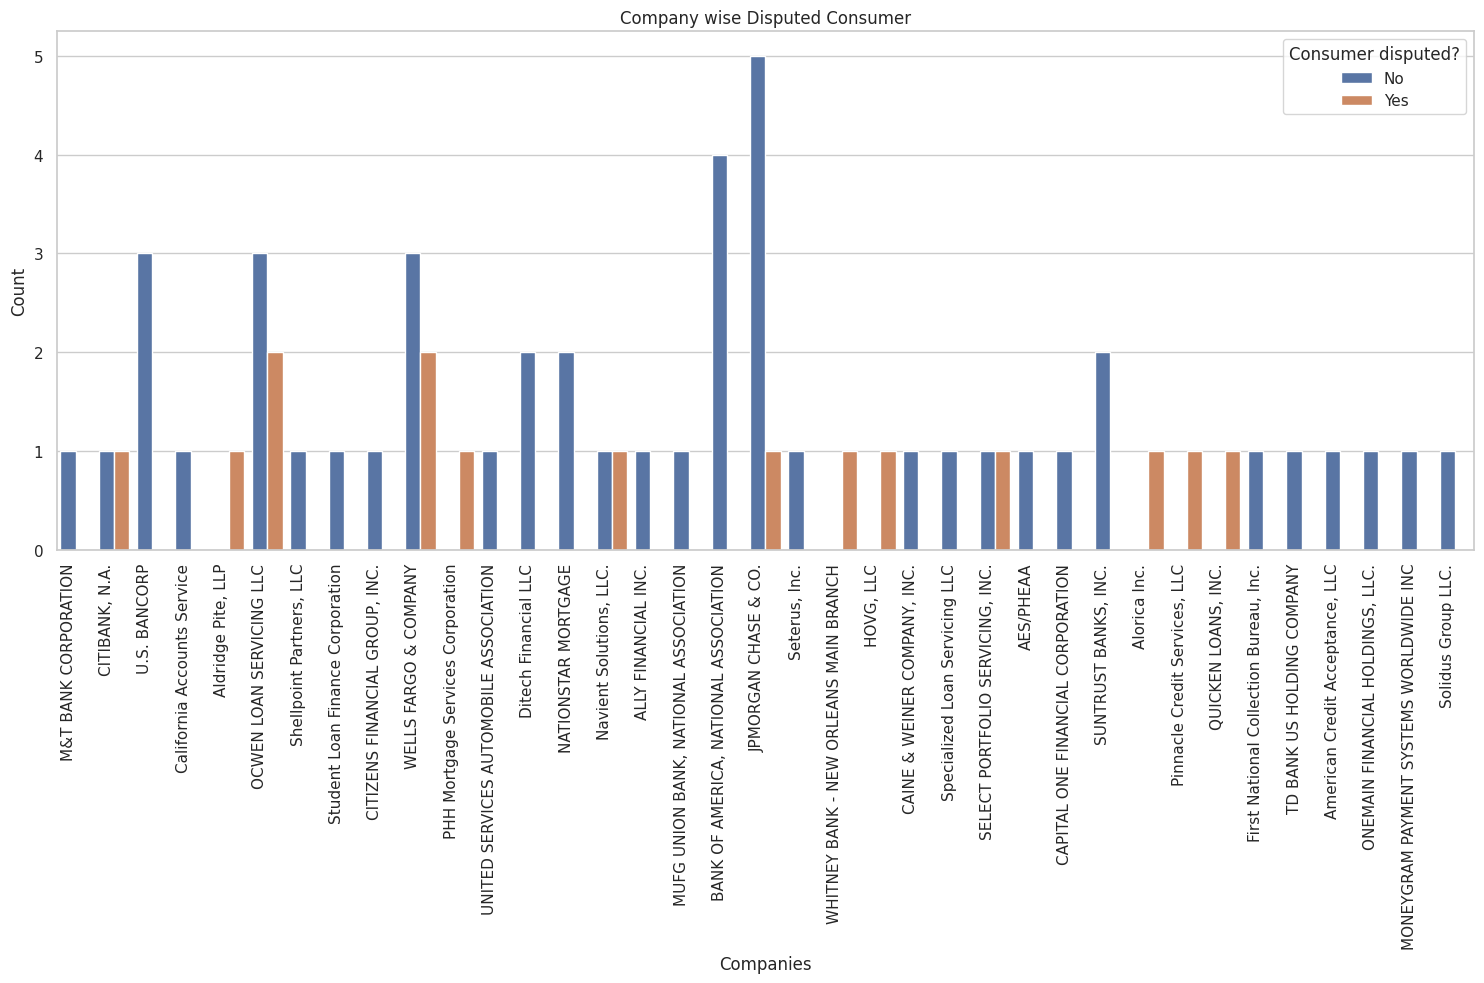

In [15]:
# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_filled, x='Company', hue='Consumer disputed?')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Company wise Disputed Consumer')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.legend(title='Consumer disputed?')

plt.tight_layout()
plt.show()

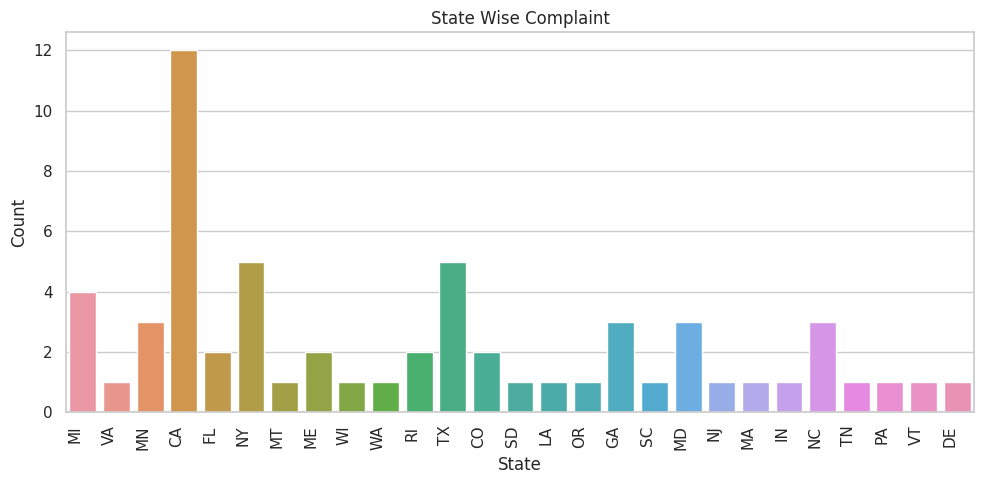

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='State')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('State Wise Complaint')
plt.xlabel('State')
plt.ylabel('Count')
# plt.legend(title='State')

plt.tight_layout()
plt.show()

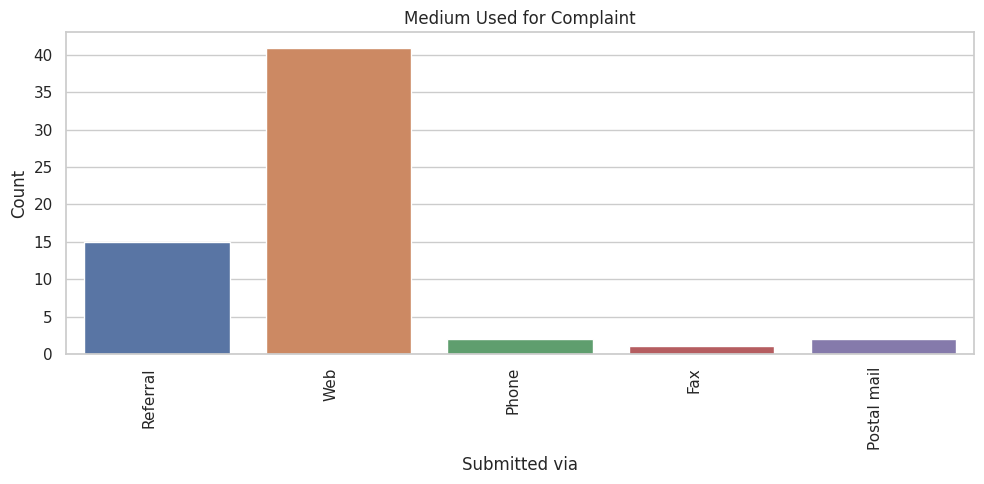

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='Submitted via')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Medium Used for Complaint')
plt.xlabel('Submitted via')
plt.ylabel('Count')
# plt.legend(title='Submitted via')

plt.tight_layout()
plt.show()

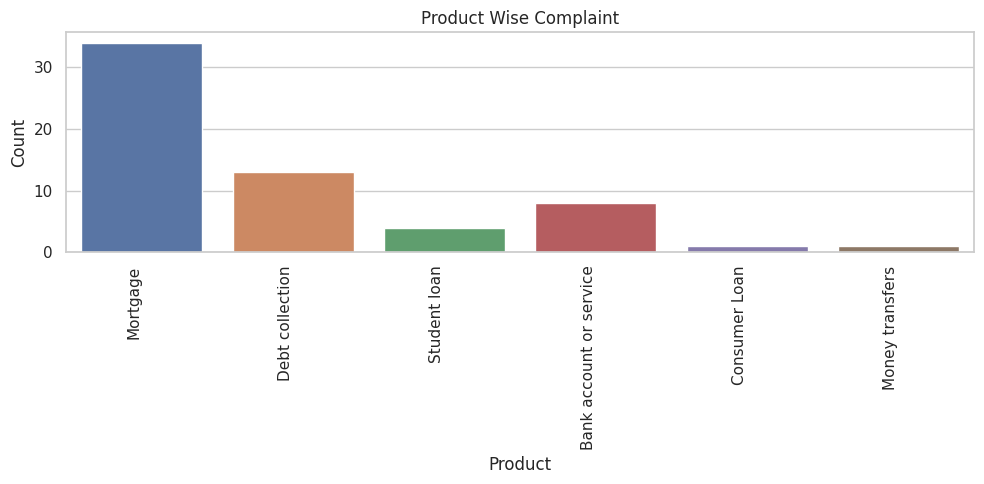

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='Product')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Product Wise Complaint')
plt.xlabel('Product')
plt.ylabel('Count')
# plt.legend(title='Submitted via')

plt.tight_layout()
plt.show()

In [19]:
df_filled.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

<h1> Business Questions
<h2> 1) Customer Satisfaction and Complaints:

What are the most common consumer complaints mentioned in the "Consumer complaint narrative" column?

**Data is not mature as out of 97, 83 consumer not mention their narrative.**

How does the "Company" respond to these complaints, and what is the average time it takes for a response ("Company public response")?

***Companies Justification not satisfied***

<h2> 2) Geographical Analysis:

Which state ("State") has the highest number of consumer complaints, and are there any specific trends or issues unique to that state?

<h2> 3) Communication Channels:

What is the most common submission method ("Submitted via") for consumer complaints, and does it impact the company's response time or resolution rate?

<h2> 4) Company Response Effectiveness:

How does the "Company response to consumer" impact the likelihood of consumers disputing the complaint ("Consumer disputed?")?

<h2> 5) Timeliness and Customer Satisfaction:

Is there a correlation between the timeliness of the company's response ("Timely response?") and whether or not the consumer disputes the complaint ("Consumer disputed?")?

In [41]:
df_fillter=df_filled.drop(['Date received','Consumer complaint narrative', 'Company public response', 'Company','State', 'ZIP code', 'Submitted via', 'Company response to consumer','Timely response?'],axis=1)
# x=df_filled['Product','Sub-product']
# y=df_filled['Consumer disputed?']
df_fillter

,Product,Sub-product,Consumer disputed?
0,Mortgage,Other mortgage,No
4,Debt collection,Credit card,Yes
5,Mortgage,Conventional adjustable mortgage (ARM),No
6,Debt collection,Medical,No
8,Mortgage,Other mortgage,Yes
...,...,...,...
91,Mortgage,Other mortgage,No
93,Bank account or service,Checking account,No
94,Money transfers,Domestic (US) money transfer,No
95,Mortgage,Conventional adjustable mortgage (ARM),No


In [42]:
df_fillter.columns

Index(['Product', 'Sub-product', 'Consumer disputed?'], dtype='object')

<h1>
Preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder
lb_Product = LabelEncoder()
df_fillter['Product']=lb_Product.fit_transform(df_fillter['Product'])
lb_Sp=LabelEncoder()
df_fillter['Sub-product']=lb_Sp.fit_transform(df_fillter['Sub-product'])
lb_cd=LabelEncoder()
df_fillter['Consumer disputed?']=lb_cd.fit_transform(df_fillter['Consumer disputed?'])
print(df_fillter)


    Product  Sub-product  Consumer disputed?
0         4           13                   0
4         2            4                   1
5         4            2                   0
6         2            8                   0
8         4           13                   1
..      ...          ...                 ...
91        4           13                   0
93        0            1                   0
94        3            5                   0
95        4            2                   0
98        2           14                   0

[61 rows x 3 columns]


In [46]:
x=df_fillter.drop(['Consumer disputed?'], axis=1)
y=df_fillter['Consumer disputed?']
print(x)
print(y)

    Product  Sub-product
0         4           13
4         2            4
5         4            2
6         2            8
8         4           13
..      ...          ...
91        4           13
93        0            1
94        3            5
95        4            2
98        2           14

[61 rows x 2 columns]
0     0
4     1
5     0
6     0
8     1
     ..
91    0
93    0
94    0
95    0
98    0
Name: Consumer disputed?, Length: 61, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.2)

<h1> Given data is not matured. as per given information KNN is being applied for prediction.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=4,p=1)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=clf.predict(x_test)
cm=confusion_matrix(y_test,pred)
print(cm)

[[7 6]
 [0 0]]


In [61]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.00      0.00      0.00         0

    accuracy                           0.54        13
   macro avg       0.50      0.27      0.35        13
weighted avg       1.00      0.54      0.70        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


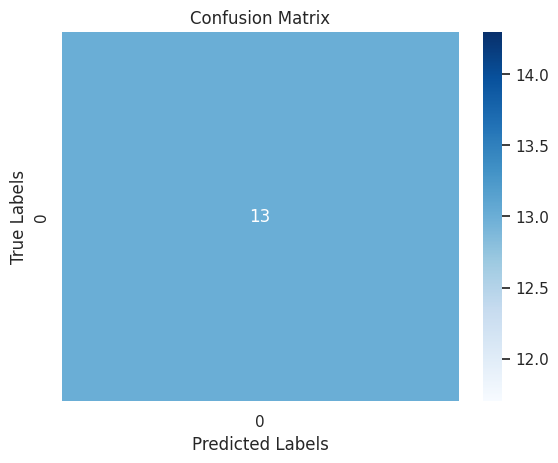

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
# sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {
                'n_neighbors':[x for x in range(1,15)]
             }
grid_search=GridSearchCV(clf,parameters,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=14, p=1)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf=best_model
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14, p=1)

In [64]:
pred=clf.predict(x_test)
cm=confusion_matrix(y_test,pred)
print(cm)

[[13]]


In [65]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

